In [5]:
import sys
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline')
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project')
import lpfet
import numpy as np
import matplotlib.pyplot as plt
import essentials
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import importlib
importlib.reload(lpfet)

<module 'lpfet' from 'C:\\Users\\tinc9\\Documents\\CNRS-offline\\quantum_main_project\\LPFET\\lpfet.py'>

# 6 site ring with 3 pairs of atoms on opposite sites

```
  o -- s
 /      \
x        x   
 \      /
  s -- o
  
```
Potential on sites are +i for o, 0 for s  and -i for x

## tolerance = 1E-6

In [30]:
x = np.arange(0.05, 2.1, 0.2)
name = '_6ring3sites_v1'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(f'\n{i:.2f}, {100 * i/max(x):.2f}%', end=', ')
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': 0, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': 0, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 4], [2, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001, oscillation_compensation=1)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_fci(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====

0.05, 2.44%, Loop 0, Loop 1, Loop 2, FCI densities (per spin): [0.50876013 0.5        0.49123987 0.50876013 0.5        0.49123987]

0.25, 12.20%, Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.54374918 0.5        0.45625082 0.54374918 0.5        0.45625082]

0.45, 21.95%, Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.5785227 0.5       0.4214773 0.5785227 0.5       0.4214773]

0.65, 31.71%, Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.61287389 0.5        0.38712611 0.61287389 0.5        0.38712611]

0.85, 41.46%, Loop 0, Loop 1, 0.00->-0.92->-0.17!=0.08, Loop 2, -0.44->-0.74->-0.40!=-0.28, -0.92->-0.17->-0.76!=-0.96, Loop 3, -0.74->-0.40->-0.68!=-0.78, -0.17->-0.76->-0.42!=-0.31, Loop 4, -0.40->-0.68->-0.47!=-0.40, Loop 5, Loop 6, Loop 7, FCI densities (per spin): [0.64655201 0.5        0.35344799 0.64655201 0.5        0.35344799]

1.05, 51.22%, Loo

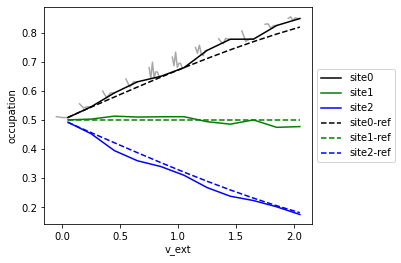

In [31]:

colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
fig, ax = plt.subplots(1,1)
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color='#a7a7a7')

ax.plot(x, y_simple[:, 0], c='k', label='site0')
ax.plot(x, y_simple[:, 1], c='g', label='site1')
ax.plot(x, y_simple[:, 2], c='b', label='site2')
ax.plot(x, y_ref[:, 0], c='k', linestyle='--', label='site0-ref')
ax.plot(x, y_ref[:, 1], c='g', linestyle='--', label='site1-ref')
ax.plot(x, y_ref[:, 2], c='b', linestyle='--', label='site2-ref')
ax.set_xlabel("v_ext")
ax.set_ylabel("occupation")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('results/6ring3/occupation(v_ext).png', dpi=150)

## Tolerance=0, num_iter=20

In [32]:
x = np.arange(0.05, 2.1, 0.2)
name = '_6ring3sites_no_tolerance'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(f'{i:.2f}, {100 * i/max(x):.2f}%', end=', ')
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': 0, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': 0, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 4], [2, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.0, oscillation_compensation=1)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_fci(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)   


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05, 2.44%, Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, FCI densities (per spin): [0.50876013 0.5        0.49123987 0.50876013 0.5        0.49123987]
0.25, 12.20%, Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, FCI densities (per spin): [0.54374918 0.5        0.45625082 0.54374918 0.5        0.45625082]
0.45, 21.95%, Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, FCI densities (per spin): [0.5785227 0.5       0.4214773 0.5785227 0.5       0.4214773]
0.65, 31.71%, Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, L

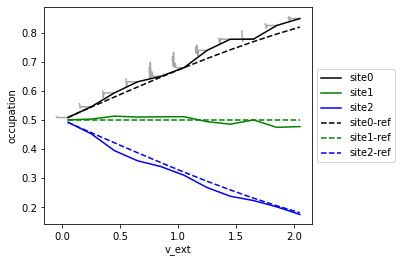

In [33]:

colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
fig, ax = plt.subplots(1,1)
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color='#a7a7a7')

ax.plot(x, y_simple[:, 0], c='k', label='site0')
ax.plot(x, y_simple[:, 1], c='g', label='site1')
ax.plot(x, y_simple[:, 2], c='b', label='site2')
ax.plot(x, y_ref[:, 0], c='k', linestyle='--', label='site0-ref')
ax.plot(x, y_ref[:, 1], c='g', linestyle='--', label='site1-ref')
ax.plot(x, y_ref[:, 2], c='b', linestyle='--', label='site2-ref')
ax.set_xlabel("v_ext")
ax.set_ylabel("occupation")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('results/6ring3/occupation(v_ext)_no-tolerance.png')

## shifting v_ext for 1.5 up

In [34]:
x = np.arange(0.05, 2.1, 0.2)
shift_potential = 1.5
name = '_6ring3sites_shift'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(f'{i:.2f}, {100 * i/max(x):.2f}%', end=', ')
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv + shift_potential, 'U': 1}, 1: {'v': 0 + shift_potential, 'U': 1}, 2: {'v': pmv + shift_potential, 'U': 1}, 3: {'v': -pmv + shift_potential, 'U': 1},
         4: {'v': 0 + shift_potential, 'U': 1}, 5: {'v': pmv + shift_potential, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 4], [2, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=1e-6, oscillation_compensation=1)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_fci(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)   


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05, 2.44%, Loop 0, Loop 1, Loop 2, FCI densities (per spin): [0.50876013 0.5        0.49123987 0.50876013 0.5        0.49123987]
0.25, 12.20%, Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.54374918 0.5        0.45625082 0.54374918 0.5        0.45625082]
0.45, 21.95%, Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.5785227 0.5       0.4214773 0.5785227 0.5       0.4214773]
0.65, 31.71%, Loop 0, Loop 1, Loop 2, Loop 3, FCI densities (per spin): [0.61287389 0.5        0.38712611 0.61287389 0.5        0.38712611]
0.85, 41.46%, Loop 0, Loop 1, 0.00->-0.92->-0.17!=0.08, Loop 2, -0.44->-0.74->-0.40!=-0.28, -0.92->-0.17->-0.76!=-0.96, Loop 3, -0.74->-0.40->-0.68!=-0.78, -0.17->-0.76->-0.42!=-0.31, Loop 4, -0.40->-0.68->-0.47!=-0.40, Loop 5, Loop 6, Loop 7, FCI densities (per spin): [0.64655201 0.5        0.35344799 0.64655201 0.5        0.35344799]
1.05, 51.22%, Loop 0, L

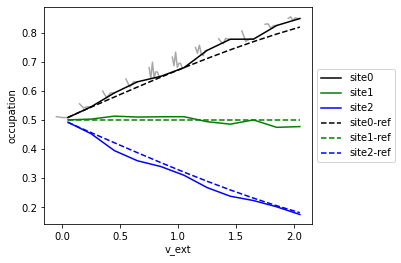

In [35]:

colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
fig, ax = plt.subplots(1,1)
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color='#a7a7a7')

ax.plot(x, y_simple[:, 0], c='k', label='site0')
ax.plot(x, y_simple[:, 1], c='g', label='site1')
ax.plot(x, y_simple[:, 2], c='b', label='site2')
ax.plot(x, y_ref[:, 0], c='k', linestyle='--', label='site0-ref')
ax.plot(x, y_ref[:, 1], c='g', linestyle='--', label='site1-ref')
ax.plot(x, y_ref[:, 2], c='b', linestyle='--', label='site2-ref')
ax.set_xlabel("v_ext")
ax.set_ylabel("occupation")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('results/6ring3/occupation(v_ext)_shift.png')

In [27]:
lpfet.COMPENSATION_1_RATIO

0.75